The Boston housing dataset is our sample dataset that provides median values of homes in different areas around Boston. Along with the median home values in $1000 (MEDV), crime (CRIM), nitric oxides concentration (NOX), the average number of rooms (RM), percentage of lower status of the population (LSTAT), and other features are provided. Our objective is to predict median home price (MEDV), the target in this scenario, using some features provided.

The data is built in scikit-learn and we will use load_boston to load the object that contains all the information.

In [1]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

For easier manipulations later, we create a pandas DataFrame from the numpy ndarrays stored in boston_dataset.data as follows:

In [2]:
import pandas as pd

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

CRIM: Crime 
NOX: Nitric Oxides Concentration 
RM: The average number of rooms
LSTAT: Percentage of lower status of the population 

## 1. Exploratory Data Analysis (EDA)

Let’s inspect the data set in 'boston' DataFrame.

In [3]:
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


As the name suggests, boston_dataset.feature_names contain names for all features. We then add the target into the DataFrame:

MEDV: The median home values in $1000 

In [4]:
boston['MEDV'] = boston_dataset.target

boston['MEDV'].head(3)

0    24.0
1    21.6
2    34.7
Name: MEDV, dtype: float64

There are 506 records, and 14 columns including 13 features and the target.

In [5]:
boston.shape

(506, 14)

In [6]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [55]:
#round() is to round the numbers
boston.round(2).head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.0,2.31,0.0,0.54,6.58,65.2,4.09,1.0,296.0,15.3,396.90,4.98,24.0
1,0.03,0.0,7.07,0.0,0.47,6.42,78.9,4.97,2.0,242.0,17.8,396.90,9.14,21.6
2,0.03,0.0,7.07,0.0,0.47,7.18,61.1,4.97,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03,0.0,2.18,0.0,0.46,7.00,45.8,6.06,3.0,222.0,18.7,394.63,2.94,33.4
4,0.07,0.0,2.18,0.0,0.46,7.15,54.2,6.06,3.0,222.0,18.7,396.90,5.33,36.2


After scanning the values, CHAS and RAD appear to be integers, not floats. According to the description of the data, CHAS identifies if the property’s tract bounds a river (=1) or not (=0); and RAD is an accessibility index to radial highways.

### a.) Summary Statistics

In [8]:
boston.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


1.) CHAS has a mean of 0.07, and its 3rd quartile is 0. Most of the values in CHAS are 0. (Mean > Median)

2.) The average number of rooms per dwelling ranges from 3.56 to 8.78, with a mean of 6.28 and a median of 6.21. The distribution of RM appears symmetric.

### b.) Visualization

Summary statistics provides a general idea of each feature and the target, but visualization reveals the information more clearly. It’s a good practice to visualize and inspect the distribution column by column.

In [9]:
import matplotlib.pyplot as plt
boston['CHAS'].plot(kind = 'hist')

plt.show()

<Figure size 640x480 with 1 Axes>

The distribution of RM appears normal and symmetric. The symmetry aligns with what we observed from the output of describe(), as the mean of RM 6.28 is close to its median 6.21.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a253c6d90>]],
      dtype=object)

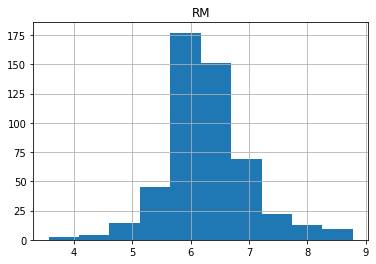

In [10]:
boston.hist(column = 'RM')

## 2. Correlation Matrix

Correlation measures linear relationships between variables. We can construct a correlation matrix to show correlation coefficients between 

In [12]:
corr_matrix = boston.corr().round(2)

corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


The last row or column is used to identify features that are most correlated with the target MEDV. LSTAT is most negatively correlated with the target (-0.74) which means that as the percentage of lower status drops, the median house values increases; while RM is most positively correlated with MEDV (0.70) which means that the house value increases as the number of rooms increases. 

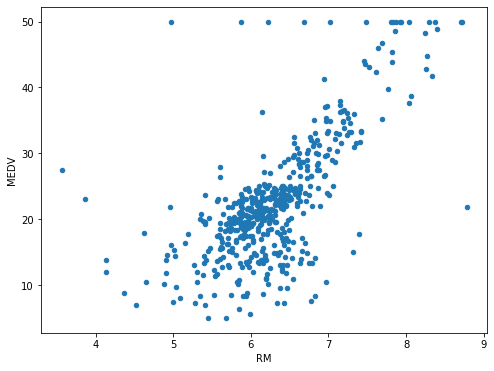

In [13]:
boston.plot(kind = 'scatter', x = 'RM', y = 'MEDV', figsize = (8, 6))

The price increases as the value of RM increases linearly. There are a few outliers that appear to be outside of the overall pattern. For example, one point on the center right corresponds to a house with almost 9 rooms but a median value slightly above $20K. Homes with similar values usually have around 6 rooms. In addition, the data seems to have a ceiling; that is the maximum median value is capped at 50.

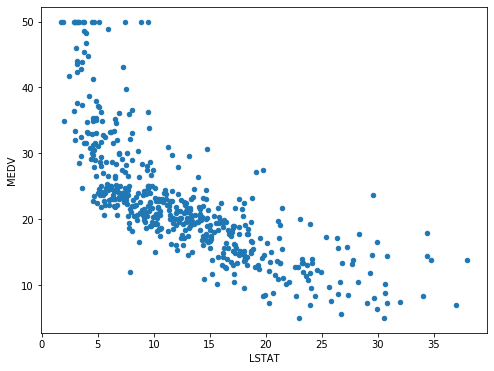

In [14]:
boston.plot(kind = 'scatter', x = 'LSTAT', y = 'MEDV', figsize = (8, 6))

On the other hand prices tend to decrease with an increase in LSTAT; and the trend isn’t as linear.

Of the two features, RM appears a better choice for predicting MEDV. Thus we start with a univariate linear regression: MEDV = b + m * RM.

In [15]:
boston.shape

(506, 14)

In scikit-learn, models require a two-dimensional feature matrix (X, 2darray or a pandas DataFrame) and a one-dimensional target array (Y). 

Here we define the feature matrix as the column RM in boston and assign it to X. Note the double brackets around 'RM' in the code below, it is to ensure the result remains a DataFrame, a 2-dimensional data structure:

In [16]:
X = boston[['RM']]
X.shape

(506, 1)

Similarly, we define our target to be the column MEDV in boston and assign it in a variable called 

In [17]:
Y = boston['MEDV']
Y.shape

(506,)

The single bracket outputs a Pandas Series, (The feature scalar Y to be a 1darray).

The double bracket outputs a Pandas DataFrame, (The feature matrix X to be a 2darray).

## 3. Linear Regression 

In scikit-learn, every class of model is represented by a class in python. A class of model is not the same as an instance of a model.

Recall that instance is an individual object of a certain class. 

Firstly, import the linear regression class then, instantiate the model to create an instance of the class LinearRegression()

In [18]:
#1. IMPORT the linear regression class
from sklearn.linear_model import LinearRegression

#2. INSTANTIATE the model
model = LinearRegression()

Next, we split the data into training and testing sets to assess the performance of the model on newly unseen data. We train the model using a training set, and save the testing set for evaluation.

Note: To get an objective assessment on model’s predictive power, it’s important to keep the testing data unseen to the built model.

A good rule of thumb is to split data 70-30, that is, 70% of data is used for training and 30% for testing.

In [19]:
#Use train_test_split function in scikit-learn’s module model_selection to split the data into two random subsets.

from sklearn.model_selection import train_test_split

#Set random_state so that the results are reproducible

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

We check the dimensions to ensure the same number of rows.

In [20]:
print(X_train.shape)
print(X_test.shape)

(354, 1)
(152, 1)


In [21]:
print(Y_train.shape)
print(Y_test.shape)

(354,)
(152,)


Fitting is how well the machine learning model measures against the data upon which it was trained.

Fitting is equal to training. It fits the model to the training data and finds the coefficients specified in the linear regression model, i.e., intercept and slope. After it is trained, the model can be used to make predictions.

In [22]:
#3. FIT the model with TRAINING data

model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The two parameters represent the intercept and slope of the line fit to the data. Our fitted model is MEDV = -30.57 + 8.46 * RM. 

In [23]:
print("Intercept :", model.intercept_.round(2))
print("Coefficient (Slope) :", model.coef_.round(2))
print("The model: MEDV = ",model.intercept_.round(2),"+ RM *",model.coef_.round(2))

Intercept : -30.57
Coefficient (Slope) : [8.46]
The model: MEDV =  -30.57 + RM * [8.46]


Once the model is trained, supervised machine learning will evaluate test data based on previous predictions for the unseen data. We can make a prediction using the predict() method. 

In [24]:
#4. PREDICT with the value testing data

#In addition, we can feed the testing set and get predictions for all homes.

y_test_predicted = model.predict(X_test)
print("The shape : ", y_test_predicted.shape)
print("")
print("we can feed the testing set and get predictions for all homes.")
print("")
print(y_test_predicted.round(1))

The shape :  (152,)

we can feed the testing set and get predictions for all homes.

[27.4 26.1 20.4 19.2 14.8 23.3 25.5 20.8 19.8 23.7 26.5 27.6 17.9 18.4
 20.4 16.9 25.7 43.3 21.6 11.1 17.7 17.  25.  23.7 22.6 19.3 21.  20.3
 33.1 15.  25.1 16.9 37.4 22.3 21.4 19.6 23.1 29.9  4.4 21.2 23.  22.8
 25.4 21.6 21.8 27.2 35.4 19.2 21.1 23.6 28.5 23.2 23.8 22.9 12.5 24.1
 18.9 21.2 20.1 39.2 23.7 25.5 18.1 23.1 15.2 28.5 40.  24.8 20.3 19.
 22.8  8.8 11.4 25.9 21.3 18.2 28.8 24.  24.5 29.9 23.8 20.4 30.2 25.5
 24.3 23.1 23.7 23.8 18.5 23.  28.5 43.1 20.1 20.3 21.9 20.3 25.2 23.9
 39.4 21.8 18.8 24.3 21.6 21.4 14.1 22.2 16.5 22.3 21.5 26.8 32.6 23.7
 21.8 32.2 31.5 30.2 20.1 15.6 28.9 39.6 19.1 26.4 26.7 22.3 25.  20.4
 21.3 21.2 16.6 26.3 18.4 23.4 22.  12.  25.4 30.7 15.1 20.  35.1 28.4
 19.7 21.5 18.8 24.3 27.5 21.1 23.8 20.2 25.5 19.9 30.4 18.6]


When the average number of rooms per dwelling is 6.5, the model predicts a home value of $24,426.06.

In [25]:
#Note that the input has to be 2-dimensional, either a 2darray or DataFrame will work in this case.
import numpy as np
new_RM = np.array([6.5]).reshape(-1,1)
model.predict(new_RM)

array([24.42606323])

This value is the same as we plug in the line b + m*x where b is the estimated intercept from the model, and m is the estimated slope.

In [26]:
-30.57 + 6.5 * 8.46

24.42000000000001

In [27]:
in_rm = float(input("Please input your expected number of rooms : "))

ex_rm = np.array(in_rm).reshape(-1, 1)

price = model.predict(ex_rm)*1000

print("The predicted home value : $", float(price.round(2)))

Please input your expected number of rooms : 43
The predicted home value : $ 333255.91


## 4. Evaluating the model

How good is our prediction? We can examine model performance by visually comparing the fitted line and the true observations in the test set.

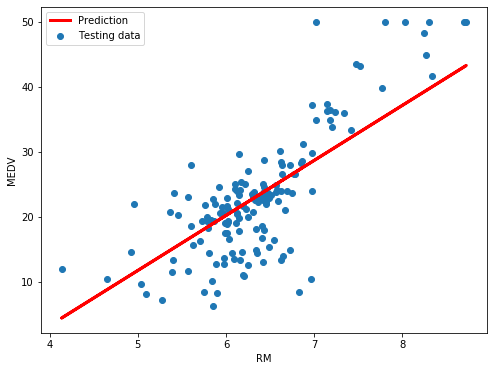

In [28]:
plt.figure(figsize = (8, 6))
plt.scatter(X_test, Y_test, label = "Testing data")
plt.plot(X_test, y_test_predicted, label = "Prediction", color = 'red', linewidth = 3)
plt.xlabel("RM"); plt.ylabel("MEDV")
plt.legend(loc = 'upper left')

Some points sit on the line, but some are away from it. We can measure the distance between a point to the line along the vertical line, and this distance is referred to as residual or error.

A residual is the difference between the observed value of the target and the predicted value.

The closer the residual is to 0, the better job our model is doing.

Residual ouput:
 307    0.821016
343   -2.184437
47    -3.849350
67     2.836736
362    6.002659
Name: MEDV, dtype: float64


Text(0, 0.5, 'Residuals')

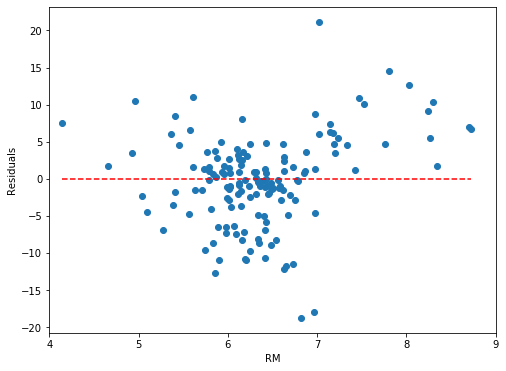

In [29]:
residual = Y_test - y_test_predicted
print("Residual ouput:\n",residual.head())

plt.figure(figsize = (8, 6))
plt.scatter(X_test, residual)

plt.hlines(y = 0, xmin = X_test.min(), xmax = X_test.max(), linestyle = '--', color = 'r')

plt.xlim(4, 9)

plt.xlabel('RM'); plt.ylabel('Residuals')

Residuals are scattered around the horizontal line, y = 0, with no particular pattern. This seemingly random distribution is a sign that the model is working. Ideally the residuals should be symmetrically and randomly spaced around the horizontal axis

If the residual plot shows some pattern, linear or nonlinear, that’s an indication that our model has room for improvement.

We learned that when each residual is near 0 it suggests a good fit. For example, the first five residuals in our model:

In [30]:
residual = Y_test - y_test_predicted
print("Residual ouput:\n",residual.head())

Residual ouput:
 307    0.821016
343   -2.184437
47    -3.849350
67     2.836736
362    6.002659
Name: MEDV, dtype: float64


Those are individual data points, how about the model performance for all data points? We need a way to aggregate the residuals and just report one number as the metric. It is natural to take the average of all residuals:

In [31]:
residual.mean()

-0.23645087766388564

-0.24 is quite close to 0, but there’s a problem: residuals can be positive or negative so taking the average cancels them out. That’s not an accurate metric. To solve this, we take a square of each residual, then take the mean of squares. This is called mean squared error (MSE):

In [32]:
(residual**2).mean()

36.5172147308386

We can also use the mean_squared_error() method under scikit-learn metrics module to output the same result:

In [33]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test, y_test_predicted)

36.517214730838624

Another common metric to evaluate the model performance is called R-squared; one can calculate it via model.score():
It is the proportion of total variation explained by the model. Here, around 60% of variability in the testing data is explained by our model.

In [34]:
model.score(X_test, Y_test)

0.6015774471545623

The total variation is calculated as the sum of squares of the difference between the response and the mean of response, in the example of testing data:

In [35]:
((Y_test - Y_test.mean())**2).sum()

13931.482039473683

Whereas the variation that the model fails to capture is computed as the sum of squares of residuals:

In [36]:
(residual**2).sum()

5550.6166390874705

Then the proportion of total variation from the data is:

In [37]:
1-5550.6166390874705/13931.482039473683

0.6015774471545623

A perfect model explains all the variation in the data. Note R-squared is between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean while 100% indicates that the model explains all of it.

Evaluating R-squared values in conjunction with residual plots quantifies model performance.

## Multivariate Linear Regression

Recall LSTAT (% lower status in population) is most negatively correlated to the home price. We can add the feature and build a multivariate linear regression model where the home price depends on both RM and LSTAT linearly: 

MEDV = b0 + b1 * RM + b2 * LSTAT

Let's check the correlation matrix again:

In [52]:
boston.corr().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


To find intercept b0, and coefficients b1 and b2, all steps are the same except for the data preparation part, we are now dealing with two features:

In [39]:
X2 = boston[["RM", "LSTAT"]]
Y = boston['MEDV']

In [40]:
X2.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


We split our dataset into training and testing dataset again:

In [41]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size = 0.3, random_state = 1)

We firstly import Linearregression, then instansiate it into model2:

In [42]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()

After we instansiated the model, then we can fit the model:

In [43]:
model2.fit(X2_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can access the parameters after model2 is fitted

In [53]:
print((model2.intercept_).round(2))
print((model2.coef_).round(2))

5.32
[ 4.13 -0.68]


Note the coefficients are stored in a 1darray of shape (2,)

MEDV = 5.32 + 4.13 * RM - 0.68 * LSTAT

Which model is better? An easy metric for linear regression is the mean squared error (MSE) on the testing data. Better models have lower MSEs. Recall the MSE of the first model on testing data is:

In [45]:
y_test_predicted2 = model2.predict(X2_test)

In [54]:
from sklearn.metrics import mean_squared_error

print("Univariate model :", mean_squared_error(Y_test, y_test_predicted).round(2))
print("Multivariate model :", mean_squared_error(Y_test, y_test_predicted2).round(2))

Univariate model : 36.52
Multivariate model : 28.93


The second model has a lower MSE, specifically a 21% reduction (36.52-28.93)/36.52 = 21%); thus it does a better job predicting the median home values than the univariate model.

In general, the more features the model includes the lower the MSE would be. Yet be careful about including too many features. Some features could be random noise, thus hurt the interpretability of the model.